### <font color='green'>**Summary**: </font>

The complete Shakya et al. dataset and subsamples of this dataset (10%, 25%, and 50%) were trimmed at quality scores of 2 and 30 using trimmomatic and classified with sourmash gather. All sourmash signatures were calculated with --scaled values of 10000, k values of 21, 31 and 51, and abundance tracking. Jaccard indices were calculated with sourmash compare. 

### <font color='green'>**Objectives**: </font>

- Compare trimmed reads and assembled metagenomes based on k-mer content 
- Determiner which samples are most similar and print

### <font color='green'>** Getting Started** </font>

To reproduce this notebook you need the following 

- CSV files containing jaccard indices 

You can retrieve data frames used in the note book with the following command: 
```
for i in $(cat comparison_file_names.txt); do osf -p dm938 fetch osfstorage/taxonomic_classification/sourmash/${i} ${PWD}/${i}; echo ${i}; done
```
or by visiting the following link https://osf.io/dm938/ and downloading the contents of the '~/comparisons/signatures' directory.

(comparison_file_names.txt can be found [here](https://github.com/dahak-metagenomics/dahak/tree/master/workflows/comparison))

### <font color='green'>Analysis: </font>

First, Set the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [1]:
%matplotlib inline

Then, import [searborn](https://seaborn.pydata.org/), [pandas](https://pandas.pydata.org/), and [matplotlib](https://matplotlib.org/) data manipulation and plotting. 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import plotly.figure_factory as ff
import plotly.plotly as py

In [5]:
import plotly 

In [8]:
plotly.tools.set_credentials_file(username='brooksph', api_key='ztCs2sa6rYNmFdTaYqjY')

Next, compare sourmash signatures representing quality trimmed reads from the complete and subsampled data at three k-mer sizes (21, 31, and 51). These data were quality trimmed (trim) at 2 and 30. 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 51')

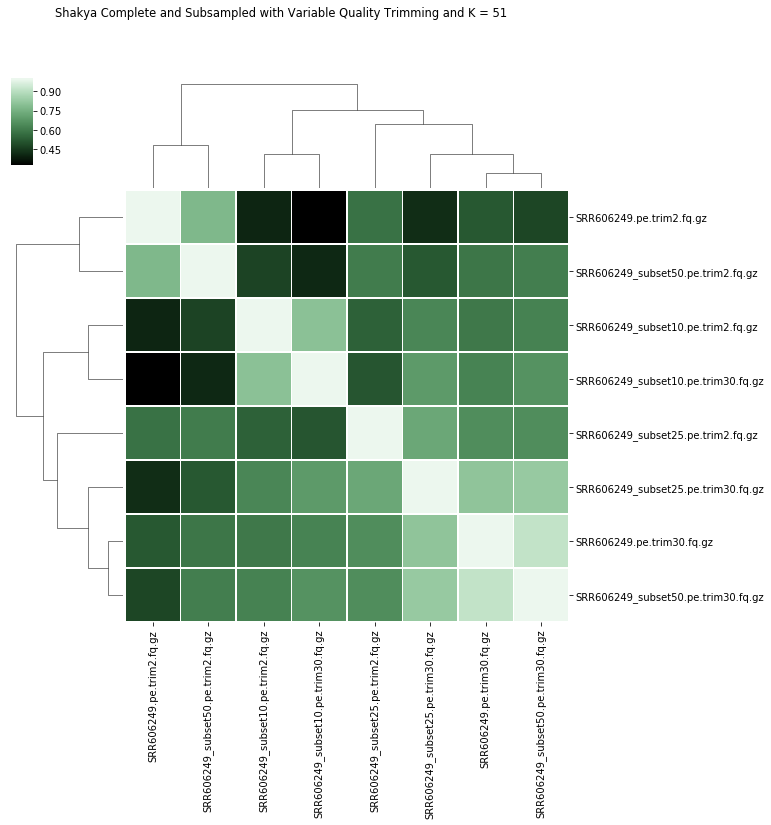

In [9]:
# k-mer size = 51

df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz': 'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 51')

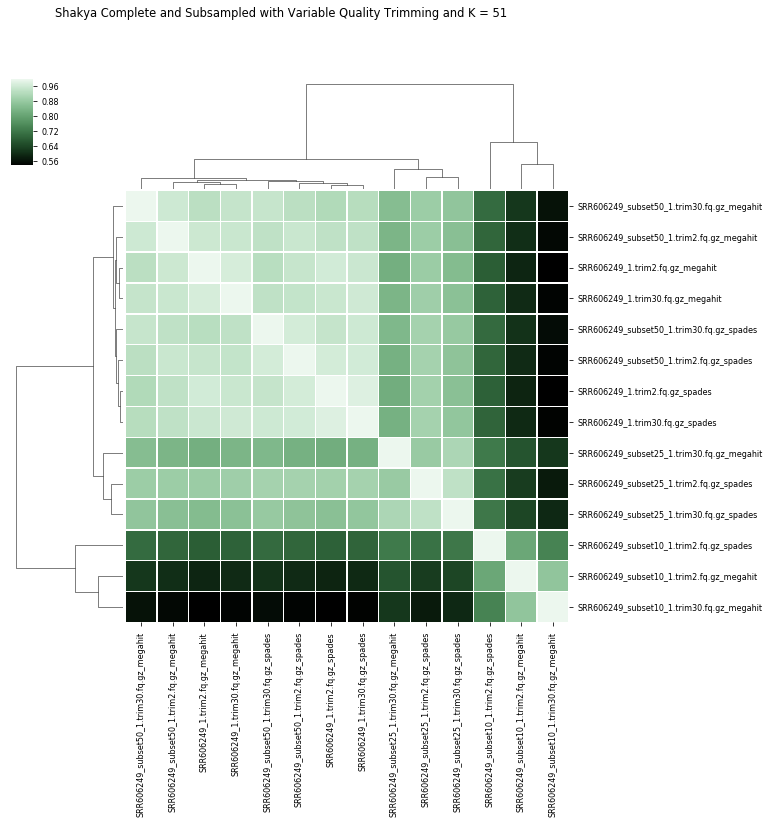

In [44]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

,SRR606249_1.trim2.fq.gz_megahit,SRR606249_1.trim2.fq.gz_spades,SRR606249_1.trim30.fq.gz_megahit,SRR606249_1.trim30.fq.gz_spades,SRR606249_subset10_1.trim2.fq.gz_megahit,SRR606249_subset10_1.trim2.fq.gz_spades,SRR606249_subset10_1.trim30.fq.gz_megahit,SRR606249_subset25_1.trim2.fq.gz_spades,SRR606249_subset25_1.trim30.fq.gz_megahit,SRR606249_subset25_1.trim30.fq.gz_spades,SRR606249_subset50_1.trim2.fq.gz_megahit,SRR606249_subset50_1.trim2.fq.gz_spades,SRR606249_subset50_1.trim30.fq.gz_megahit,SRR606249_subset50_1.trim30.fq.gz_spades
,,,,,,,,,,,,,,
SRR606249_1.trim2.fq.gz_megahit,1.000000,0.964020,0.972618,0.956067,0.592004,0.678187,0.538162,0.889238,0.826999,0.853549,0.956986,0.949745,0.935211,0.932285
SRR606249_1.trim2.fq.gz_spades,0.964020,1.000000,0.954101,0.981470,0.590310,0.683265,0.536300,0.901498,0.822641,0.864135,0.941826,0.968741,0.921438,0.947756
SRR606249_1.trim30.fq.gz_megahit,0.972618,0.954101,1.000000,0.960386,0.599482,0.685665,0.545050,0.895501,0.839239,0.865014,0.954532,0.946395,0.948358,0.940729
SRR606249_1.trim30.fq.gz_spades,0.956067,0.981470,0.960386,1.000000,0.597263,0.689331,0.542903,0.905764,0.831546,0.875050,0.941084,0.965374,0.930595,0.959086
SRR606249_subset10_1.trim2.fq.gz_megahit,0.592004,0.590310,0.599482,0.597263,1.000000,0.812522,0.873794,0.626181,0.664087,0.640499,0.604638,0.598565,0.617918,0.609281
SRR606249_subset10_1.trim2.fq.gz_spades,0.678187,0.683265,0.685665,0.689331,0.812522,1.000000,0.744306,0.712303,0.725919,0.721476,0.690321,0.691485,0.701151,0.700649
SRR606249_subset10_1.trim30.fq.gz_megahit,0.538162,0.536300,0.545050,0.542903,0.873794,0.744306,1.000000,0.573298,0.618385,0.594482,0.549359,0.543725,0.563350,0.554910
SRR606249_subset25_1.trim2.fq.gz_spades,0.889238,0.901498,0.895501,0.905764,0.626181,0.712303,0.573298,1.000000,0.885029,0.941697,0.892338,0.904285,0.892818,0.905810
SRR606249_subset25_1.trim30.fq.gz_megahit,0.826999,0.822641,0.839239,0.831546,0.664087,0.725919,0.618385,0.885029,1.000000,0.914504,0.839325,0.830990,0.858229,0.845393


In [12]:
df = pd.read_csv("SRR606249.pe.trim2and30_reads_and_contigs_comparison.k51.csv")
df

,/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa,/data/SRR606249_subset10.pe.trim30.fq.gz,/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta,/data/SRR606249_subset25.pe.trim2.fq.gz,/data/SRR606249.pe.trim30.fq.gz,/data/SRR606249.pe.trim2.fq.gz,/data/SRR606249_subset50.pe.trim2.fq.gz,/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_spades_output/contigs.fasta,/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa,...,/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta,/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa,/data/SRR606249_subset50.pe.trim30.fq.gz,/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta,/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta,/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta,/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa
0,1.000000,0.695303,0.941084,0.652289,0.796400,0.422169,0.539537,0.879308,0.639740,0.549359,...,0.954532,0.861712,0.958441,0.843401,0.892338,0.954097,0.604638,0.940551,0.956986,0.839325
1,0.695303,1.000000,0.688665,0.515495,0.629410,0.327220,0.412614,0.701281,0.757070,0.666179,...,0.695317,0.697994,0.704478,0.663707,0.692708,0.686808,0.694201,0.694490,0.688886,0.704790
2,0.941084,0.688665,1.000000,0.649693,0.805607,0.424125,0.536529,0.868327,0.638658,0.542903,...,0.960386,0.875050,0.930595,0.843004,0.905764,0.965374,0.597263,0.959086,0.956067,0.831546
3,0.652289,0.515495,0.649693,1.000000,0.651675,0.584408,0.608354,0.639777,0.460432,0.400639,...,0.655878,0.629762,0.645412,0.652656,0.652979,0.647867,0.438431,0.641937,0.657357,0.611172
4,0.796400,0.629410,0.805607,0.651675,1.000000,0.519851,0.593865,0.733551,0.534035,0.457325,...,0.811356,0.726459,0.787355,0.919683,0.751217,0.794994,0.502979,0.787934,0.811800,0.702156
5,0.422169,0.327220,0.424125,0.584408,0.519851,1.000000,0.776402,0.385909,0.278051,0.237971,...,0.426892,0.379019,0.412790,0.478097,0.395840,0.421361,0.263395,0.413092,0.431892,0.365956
6,0.539537,0.412614,0.536529,0.608354,0.593865,0.776402,1.000000,0.492630,0.357071,0.306080,...,0.540823,0.484120,0.528601,0.615781,0.503917,0.537944,0.338183,0.528523,0.545372,0.468674
7,0.879308,0.701281,0.868327,0.639777,0.733551,0.385909,0.492630,1.000000,0.673008,0.591938,...,0.876278,0.906954,0.883920,0.781097,0.921750,0.869838,0.645891,0.874546,0.869185,0.929333
8,0.639740,0.757070,0.638658,0.460432,0.534035,0.278051,0.357071,0.673008,1.000000,0.802223,...,0.635616,0.683291,0.654682,0.577146,0.664365,0.639414,0.807750,0.652339,0.627511,0.694564
9,0.549359,0.666179,0.542903,0.400639,0.457325,0.237971,0.306080,0.591938,0.802223,1.000000,...,0.545050,0.594482,0.563350,0.495854,0.573298,0.543725,0.873794,0.554910,0.538162,0.618385


Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 51')

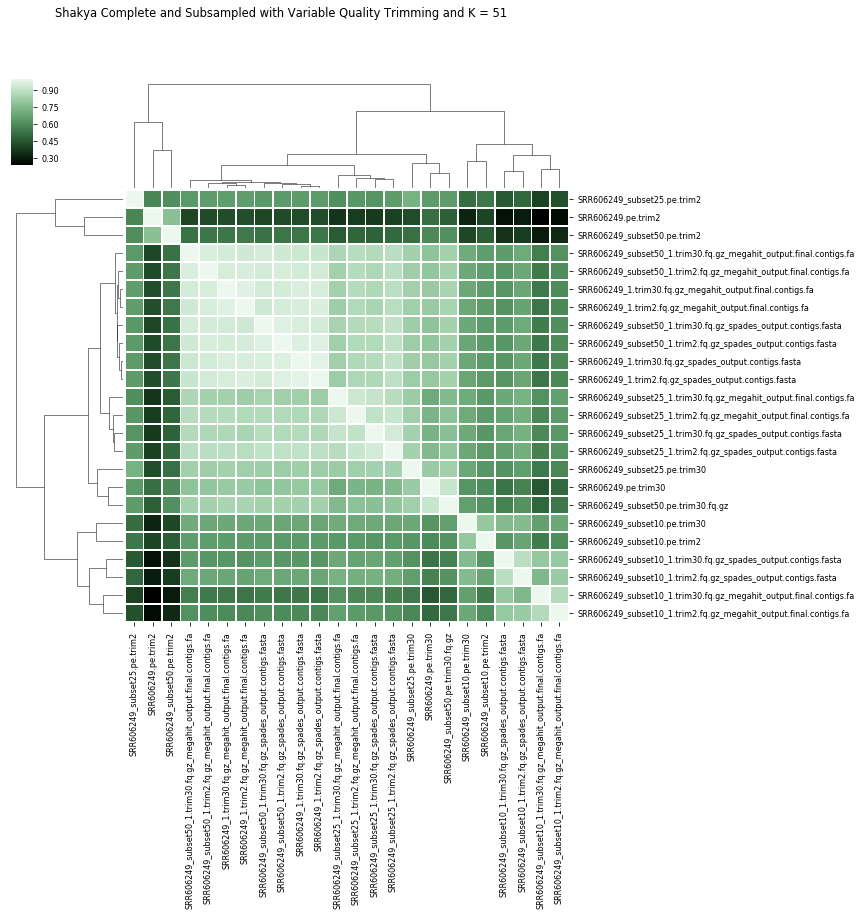

In [13]:
# Reads and contigs k = 51 
df = pd.read_csv("SRR606249.pe.trim2and30_reads_and_contigs_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset50_1.trim2.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz':'SRR606249_subset10.pe.trim30',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta':'SRR606249_1.trim30.fq.gz_spades_output.contigs.fasta',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz':'SRR606249_subset25.pe.trim2',
                                      '/data/SRR606249.pe.trim30.fq.gz':'SRR606249.pe.trim30',
                                      '/data/SRR606249.pe.trim2.fq.gz':'SRR606249.pe.trim2',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz':'SRR606249_subset50.pe.trim2',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset25_1.trim2.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_spades_output/contigs.fasta':'SRR606249_subset10_1.trim30.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset10_1.trim30.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz':'SRR606249_subset25.pe.trim30',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta':'SRR606249_subset10_1.trim2.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta':'SRR606249_1.trim2.fq.gz_spades_output.contigs.fasta',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz':'SRR606249_subset10.pe.trim2',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim30.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta':'SRR606249_subset25_1.trim30.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset50_1.trim30.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':'SRR606249_subset50.pe.trim30.fq.gz',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta':'SRR606249_subset25_1.trim2.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta':'SRR606249_subset50_1.trim2.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset10_1.trim2.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta':'SRR606249_subset50_1.trim30.fq.gz_spades_output.contigs.fasta',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit_output.final.contigs.fa',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa':'SRR606249_subset25_1.trim30.fq.gz_megahit_output.final.contigs.fa'})

dfnew [''] = ('SRR606249_subset50_1.trim2.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset10.pe.trim30',
              'SRR606249_1.trim30.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset25.pe.trim2',
              'SRR606249.pe.trim30',
              'SRR606249.pe.trim2',
              'SRR606249_subset50.pe.trim2',
              'SRR606249_subset25_1.trim2.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset10_1.trim30.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset10_1.trim30.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset25.pe.trim30',
              'SRR606249_subset10_1.trim2.fq.gz_spades_output.contigs.fasta',
              'SRR606249_1.trim2.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset10.pe.trim2',
              'SRR606249_1.trim30.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset25_1.trim30.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset50_1.trim30.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset50.pe.trim30.fq.gz',
              'SRR606249_subset25_1.trim2.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset50_1.trim2.fq.gz_spades_output.contigs.fasta',
              'SRR606249_subset10_1.trim2.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset50_1.trim30.fq.gz_spades_output.contigs.fasta',
              'SRR606249_1.trim2.fq.gz_megahit_output.final.contigs.fa',
              'SRR606249_subset25_1.trim30.fq.gz_megahit_output.final.contigs.fa')
              
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

In [17]:
# Determine which samples are most similar to each other 
stacked_output = output.stack()
df = pd.DataFrame(stacked_output, columns=['Jaccard_similarity'])
stacked_sorted_output = df.sort_values('Jaccard_similarity', ascending=False)
df.to_csv('stacked_sorted_output.csv') 
stacked_sorted_output

,,Jaccard_similarity
,,
SRR606249_subset50_1.trim2.fq.gz_megahit_output.final.contigs.fa,SRR606249_subset50_1.trim2.fq.gz_megahit_output.final.contigs.fa,1.000000
SRR606249_1.trim2.fq.gz_spades_output.contigs.fasta,SRR606249_1.trim2.fq.gz_spades_output.contigs.fasta,1.000000
SRR606249_subset25.pe.trim2,SRR606249_subset25.pe.trim2,1.000000
SRR606249.pe.trim30,SRR606249.pe.trim30,1.000000
SRR606249.pe.trim2,SRR606249.pe.trim2,1.000000
SRR606249_subset50.pe.trim2,SRR606249_subset50.pe.trim2,1.000000
SRR606249_subset25_1.trim2.fq.gz_megahit_output.final.contigs.fa,SRR606249_subset25_1.trim2.fq.gz_megahit_output.final.contigs.fa,1.000000
SRR606249_subset10_1.trim30.fq.gz_spades_output.contigs.fasta,SRR606249_subset10_1.trim30.fq.gz_spades_output.contigs.fasta,1.000000
SRR606249_subset10_1.trim30.fq.gz_megahit_output.final.contigs.fa,SRR606249_subset10_1.trim30.fq.gz_megahit_output.final.contigs.fa,1.000000


In [25]:
import igraph as ig

DeprecationWarning: To avoid name collision with the igraph project, this visualization library has been renamed to 'jgraph'. Please upgrade when convenient.

In [27]:
import json

In [49]:
data = output.to_json(orient='index')
data

'{"SRR606249_1.trim2.fq.gz_megahit":{"SRR606249_1.trim2.fq.gz_megahit":1.0,"SRR606249_1.trim2.fq.gz_spades":0.9640196078,"SRR606249_1.trim30.fq.gz_megahit":0.9726182841,"SRR606249_1.trim30.fq.gz_spades":0.956067151,"SRR606249_subset10_1.trim2.fq.gz_megahit":0.5920043273,"SRR606249_subset10_1.trim2.fq.gz_spades":0.6781874417,"SRR606249_subset10_1.trim30.fq.gz_megahit":0.5381617248,"SRR606249_subset25_1.trim2.fq.gz_spades":0.8892377122,"SRR606249_subset25_1.trim30.fq.gz_megahit":0.8269988184,"SRR606249_subset25_1.trim30.fq.gz_spades":0.8535494964,"SRR606249_subset50_1.trim2.fq.gz_megahit":0.9569860721,"SRR606249_subset50_1.trim2.fq.gz_spades":0.9497447978,"SRR606249_subset50_1.trim30.fq.gz_megahit":0.9352107129,"SRR606249_subset50_1.trim30.fq.gz_spades":0.9322850123},"SRR606249_1.trim2.fq.gz_spades":{"SRR606249_1.trim2.fq.gz_megahit":0.9640196078,"SRR606249_1.trim2.fq.gz_spades":1.0,"SRR606249_1.trim30.fq.gz_megahit":0.9541014187,"SRR606249_1.trim30.fq.gz_spades":0.9814703826,"SRR606249_

In [51]:
output.keys()

Index(['SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades',
       'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades',
       'SRR606249_subset10_1.trim2.fq.gz_megahit',
       'SRR606249_subset10_1.trim2.fq.gz_spades',
       'SRR606249_subset10_1.trim30.fq.gz_megahit',
       'SRR606249_subset25_1.trim2.fq.gz_spades',
       'SRR606249_subset25_1.trim30.fq.gz_megahit',
       'SRR606249_subset25_1.trim30.fq.gz_spades',
       'SRR606249_subset50_1.trim2.fq.gz_megahit',
       'SRR606249_subset50_1.trim2.fq.gz_spades',
       'SRR606249_subset50_1.trim30.fq.gz_megahit',
       'SRR606249_subset50_1.trim30.fq.gz_spades'],
      dtype='object')

In [ ]:
install.packages("plotly")
library(plotly, warn.conflicts = FALSE)
sourmash_comp_matrix <- read.csv("SRR606249.pe.trim2and30_reads_and_contigs_comparison.k51.csv")

# Label the rows
rownames(sourmash_comp_matrix) <- colnames(sourmash_comp_matrix)

# Transform for plotting
sourmash_comp_matrix <- as.matrix(sourmash_comp_matrix)

fit <- dist(sourmash_comp_matrix)
fit <- cmdscale(fit)

#row.names(fit) <- gsub(".fq.gz", "", row.names(fit))
#row.names(fit) <- gsub("X.data.osfstorage.assembly.", "", row.names(fit))
#row.names(fit) <- gsub("X.data", "", row.names(fit))
#row.names(fit) <- gsub("_output.final.contigs.fa", "", row.names(fit))
#row.names(fit)

x <- fit[, 1]
y <- fit[, 2]
text(fit[,1:2], labels = row.names(fit), pos = 1)
p
#p <- plot_ly(fit[ , 1], fit[ , 2], xlab = "Dimension 1", ylab = "Dimension 2")
p

In [ ]:
# Create tsne
install.packages("Rtsne")
library(Rtsne)

tsne_model <- Rtsne(sourmash_comp_matrix, check_duplicates=FALSE, pca=TRUE, perplexity=5, theta=0.5, dims=2)
d_tsne = as.data.frame(tsne_model$Y) 
plot(d_tsne$V1, d_tsne$V2)


In [ ]:
# k-mer size = 21 
df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k21.csv")

# Clean up files names by removing path
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz':'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 

# Rename index to change numbers to files names 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)

# Set context, save, and create title
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 21') 

In [ ]:
# k-mer size = 31

df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k31.csv")

# Clean up files names by removing path
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz':	'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 

# Rename index to change numbers to files names 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
# Set context, save, and create title

sns.set_context('paper')
o.savefig("clustermap_compare_reads_k31.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 31') 

In [ ]:
# k-mer size = 51

df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz': 'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

In [ ]:
### Conclusions: 
- 
- 

### Remaining questions 
- 
- 


#### <font color='green'>Second, comparing k-mer content of assemblies from SPAdes and MEGAHIT from complete and subsampled datasets with light and aggressive trimming. <font>

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k21.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled data Assembled with MEGAHIT or SPAdes with Variable Quality Trimming and K = 21') 

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k31.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k31.pdf")

o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 31') 

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

#### Now, comparing k-mers content in reads to assembled contigs at three k-mer sizes and light or aggressive trimming.

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k21.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 21') 

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k31.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k31.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31') 

In [ ]:
df

In [ ]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31') 

#### Conclusions: 
- The k-mer content of reads and their assembled contigs vary significantly regardless 
    trimming procedure. Taxonomic classification protocols show that assembly decreases the number of 
    false psotives thus assembly is a good filtering mechanism. 
- Further, the k-mer content of light and agressively trimmed datasets vary significantly 
    -Note: The assemblies are pretty similar in size and but vary drastically in gene content

#### Next steps: 
- Extract unassigned reads 
- Compare these results to clustering with commet 

In [ ]:
# List samples in x, y format to determine which samples are most similar 
# Sample1, Samples 2, Jaccard index 
stacked_output = output.stack()
df = pd.DataFrame(stacked_output, columns=['one'])
df.sort_values('one', ascending=False)